In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
!pip install skan
from PIL import Image, ImageOps
import os 
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage.morphology import skeletonize
from skan import Skeleton, summarize, draw


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.3 MB/s eta 0:00:00


In [45]:
def crack_width(mask):
  plt.imshow(mask)
  gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
  plt.imshow(gray)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

  # get distance transform
  distance = thresh.copy()
  distance = cv2.distanceTransform(distance, distanceType=cv2.DIST_L2, maskSize=5).astype(np.float32)
  plt.imshow(distance)
  print(np.max(distance))
  # get skeleton (medial axis)
  binary = thresh.copy()
  binary = binary.astype(np.float32)/255
  skeleton = skimage.morphology.skeletonize(binary).astype(np.float32)
  plt.imshow(skeleton)
  # apply skeleton to select center line of distance 
  thickness = cv2.multiply(distance, skeleton)

  # get average thickness for non-zero pixels
  average = np.mean(thickness[skeleton!=0])

  # thickness = 2*average
  thick = 2 * average
  print("thickness:", thick)

  branch_data = summarize(Skeleton(skeleton))
  print(branch_data.head())

  result = draw.overlay_euclidean_skeleton_2d(mask, branch_data,
                                   skeleton_color_source='branch-distance')
  return result

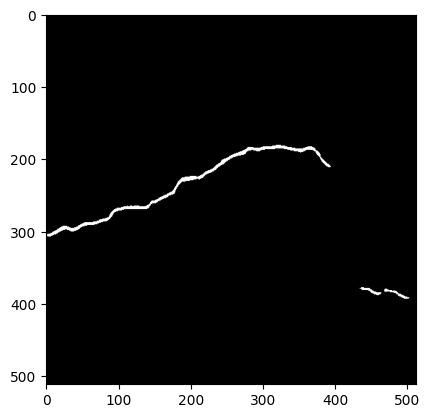

In [31]:
# read input
mask = cv2.imread('/content/drive/MyDrive/Segmentation images/result_NEWDATA_aug_20/039_0.jpg')



3.1969
thickness: 4.2661824226379395
   skeleton-id  node-id-src  node-id-dst  branch-distance  branch-type  \
0            0          160          400       466.203102            0   
1            1          403          441        31.313708            0   
2            2          419          466        38.142136            0   

   mean-pixel-value  stdev-pixel-value  image-coord-src-0  image-coord-src-1  \
0               1.0                0.0                210                392   
1               1.0                0.0                379                434   
2               1.0                0.0                382                468   

   image-coord-dst-0  image-coord-dst-1  coord-src-0  coord-src-1  \
0                306                  1          210          392   
1                385                462          379          434   
2                392                502          382          468   

   coord-dst-0  coord-dst-1  euclidean-distance  
0          306    

<Axes: >

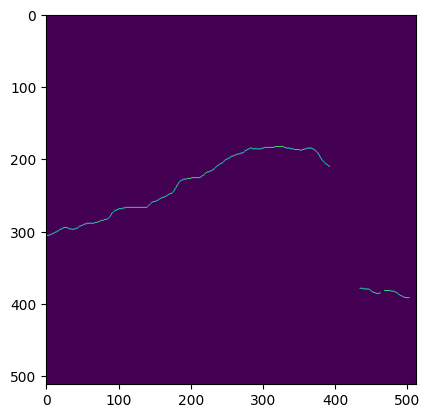

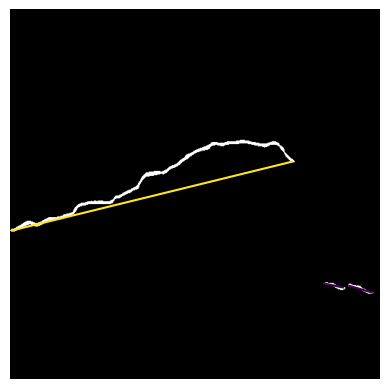

In [46]:
crack_width(mask)